In [1]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import equilateral_real
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

%load_ext autoreload
%autoreload 2

In [2]:
def Gaussexp(z, lamb):
    return 1j*lamb*np.dot(z,z)

def gradh(z, lamb):
    return 2*1j*lamb*np.conj(z)

def answer(lamb):
    return np.pi*1j/lamb

In [3]:
# init model
lamb = 1
delta = 0.1
Nstep = 150
dt = 1e-2

contour = equilateral_real(20, (-0.5,0.5,-0.5,0.5))

plind = plmodel(contour, Gaussexp, grad=gradh, expargs=[lamb])

In [54]:
plind.descend(dt, Nstep, delta, -5)

In [55]:
plind.integrate()
print(plind.integral)
print(answer(lamb))

(0.0006240797465611954+3.115241176684228j)
3.141592653589793j


In [56]:
len(plind.contour.points)

1908

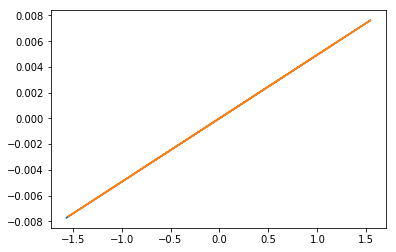

In [57]:
plt.figure()
plt.plot(np.real(plind.contour.points[:,0]), (np.real(plind.contour.points[:,0])-np.imag(plind.contour.points[:,0])))
plt.plot(np.real(plind.contour.points[:,1]), (np.real(plind.contour.points[:,1])-np.imag(plind.contour.points[:,1])))
plt.show()

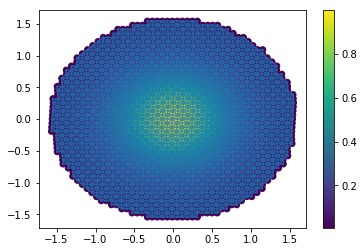

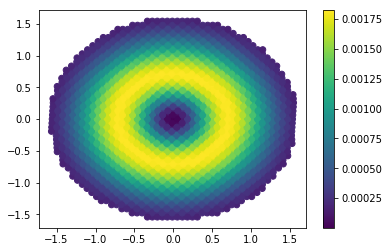

In [58]:
intfun = plind.get_intfun()
xs = np.real(plind.contour.points[:,0])
ys = np.real(plind.contour.points[:,1])
intvals = np.array([intfun(p, lamb) for p in plind.contour.points])
triang = mtri.Triangulation(xs,ys,plind.contour.simplices)

plt.figure()
plt.scatter(xs, ys, c=intvals.real)
plt.triplot(triang, alpha=0.8)
plt.colorbar()
plt.show()


plt.figure()
plt.scatter(xs, ys, c=intvals.imag)
plt.colorbar()
plt.show()